In [1]:
import pandas as pd
from scipy.stats import rankdata
import matplotlib.pyplot as plt
import numpy as np

In [2]:
### PREPROCESSING ###
# Define adjusted p-value of interest
adjp_of_interest = 0.1

In [3]:
# Load data
l2p_regression = pd.read_feather("../data/2025-12-05-08:26:09_l2p_regression_gender_age_pckyr_race.feather")
p2l_regression = pd.read_feather("../data/2025-12-05-08:26:09_p2l_regression_gender_age_pckyr_race.feather")
l2p_merged = pd.read_feather("../data/2025-12-04-16:39:25_l2p_merged.feather")
p2l_merged = pd.read_feather("../data/2025-12-04-18:54:47_p2l_merged.feather")

In [4]:
l2p_regression

,edge,beta_score,p_value
0,ALX1_MIR1-1,0.095514,0.162902
1,ALX3_MIR1-1,-0.049682,0.604814
2,ALX4_MIR1-1,0.028693,0.697794
3,ARGFX_MIR1-1,-0.049579,0.563365
4,ARID3A_MIR1-1,0.020622,0.774635
...,...,...,...
326452,ZSCAN4_MIR99B,-0.111872,0.164306
326453,ZSCAN5_MIR99B,-0.034083,0.730261
326454,ZSCAN5C_MIR99B,0.079100,0.206339
326455,ZSCAN9_MIR99B,-0.109745,0.105478


In [5]:
# Preprocess regression data
l2p_regression[['TF', 'Gene']] = l2p_regression['edge'].str.split("_", expand = True)
p2l_regression[['TF', 'Gene']] = p2l_regression['edge'].str.split("_", expand = True)
l2p_regression.index = l2p_regression['edge']
p2l_regression.index = p2l_regression['edge']
p2l_regression = p2l_regression.reindex(l2p_regression.index)
p2l_regression = p2l_regression.drop(columns="edge")
l2p_regression = l2p_regression.drop(columns="edge")

In [6]:
# Add adjusted p values
p = l2p_regression.p_value.values
n = len(p)
ranks = rankdata(p, method='average')
fdr = p * n / ranks
fdr[fdr > 1] = 1
l2p_regression['adj_p'] = fdr


p = p2l_regression.p_value.values
n = len(p)
ranks = rankdata(p, method='average')
fdr = p * n / ranks
fdr[fdr > 1] = 1
p2l_regression['adj_p'] = fdr

(array([35175., 31374., 31968., 31943., 32537., 33093., 32849., 32498.,
        32514., 32506.]),
 array([1.02407807e-07, 1.00000050e-01, 1.99999998e-01, 2.99999946e-01,
        3.99999894e-01, 4.99999842e-01, 5.99999790e-01, 6.99999738e-01,
        7.99999686e-01, 8.99999634e-01, 9.99999582e-01]),
 <BarContainer object of 10 artists>)

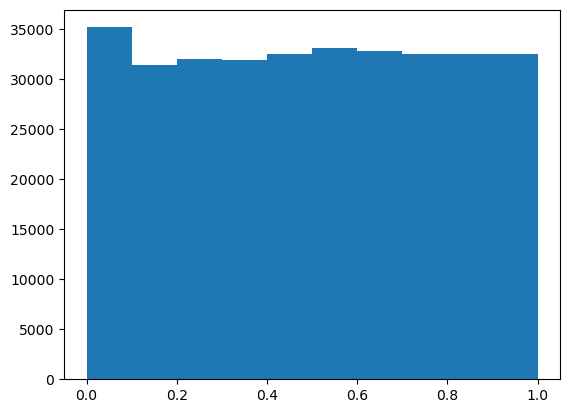

In [22]:
plt.hist(p2l_regression['p_value'])

ANALYZING MOST INTERESTING EDGES

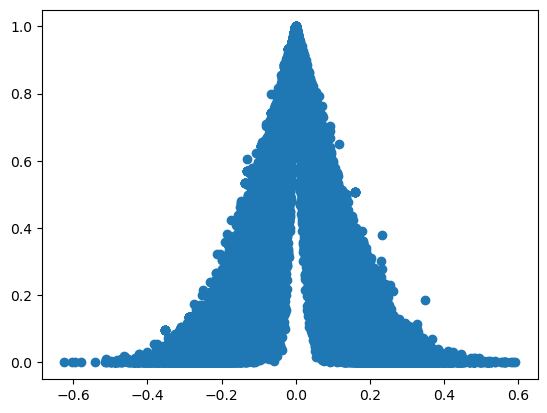

In [16]:
# Scatterplot of L2P beta_score vs p_value
plt.scatter(l2p_regression['beta_score'], l2p_regression['p_value'])

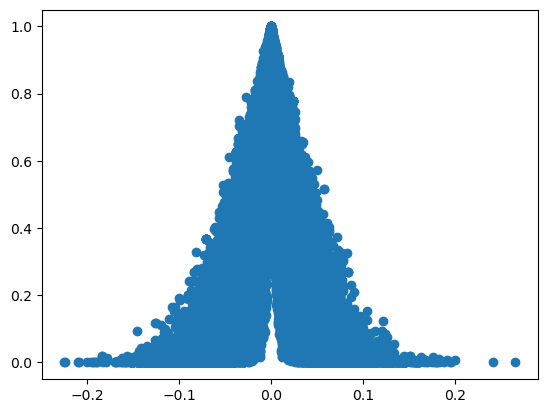

In [17]:
# Scatterplot of P2L beta_score vs p_value
plt.scatter(p2l_regression['beta_score'], p2l_regression['p_value'])

In [9]:
# Identify significant edges from the regression
l2p_sig_edges = l2p_regression[l2p_regression['p_value'] < 0.01]
p2l_sig_edges = p2l_regression[p2l_regression['p_value'] < 0.01]

print(l2p_sig_edges.shape)
print(p2l_sig_edges.shape)
print(l2p_regression[l2p_regression['adj_p'] < adjp_of_interest])
print(p2l_regression[p2l_regression['adj_p'] < adjp_of_interest])

(4271, 5)
(4790, 5)
Empty DataFrame
Columns: [beta_score, p_value, TF, Gene, adj_p]
Index: []
                 beta_score       p_value      TF      Gene     adj_p
edge                                                                 
NOBOX_MIR127       0.091225  6.840853e-07   NOBOX    MIR127  0.074441
ZNF486_MIR127      0.088051  1.376584e-06  ZNF486    MIR127  0.089879
ZNF431_MIR128-2   -0.162299  1.534895e-06  ZNF431  MIR128-2  0.083513
ZNF410_MIR139      0.265611  1.024078e-07  ZNF410    MIR139  0.033432
DPRX_MIR616        0.171141  1.579391e-06    DPRX    MIR616  0.073658
DPRX_MIR625        0.188480  2.087989e-06    DPRX    MIR625  0.085205
DPRX_MIR9-3        0.241825  1.223154e-07    DPRX    MIR9-3  0.019965


In [10]:
# Identify TFs and genes with the most significant edges
l2p_set = set(l2p_sig_edges.index)
p2l_set = set(p2l_sig_edges.index)

l2p_sig_gene_counts = l2p_sig_edges['Gene'].value_counts()
p2l_sig_gene_counts = p2l_sig_edges['Gene'].value_counts()

l2p_sig_TF_counts = l2p_sig_edges['TF'].value_counts()
p2l_sig_TF_counts = p2l_sig_edges['TF'].value_counts()

p2l_norm_gene_counts = (p2l_sig_edges['Gene'].value_counts() / p2l_regression['Gene'].value_counts()).sort_values(ascending = False) 
l2p_norm_gene_counts = (l2p_sig_edges['Gene'].value_counts() / l2p_regression['Gene'].value_counts()).sort_values(ascending = False) 

p2l_norm_tf_counts = (p2l_sig_edges['TF'].value_counts() / p2l_regression['TF'].value_counts()).sort_values(ascending = False) 
l2p_norm_tf_counts = (l2p_sig_edges['TF'].value_counts() / l2p_regression['TF'].value_counts()).sort_values(ascending = False) 


print("P2L vs L2P # Significant Edges with Gene (Raw)")
print("P2L")
print(p2l_sig_gene_counts[0:5])
print("L2P")
print(l2p_sig_gene_counts[0:5])

print("P2L vs L2P # Significant Edges with Gene (Normalized)")
print("P2L")
print(p2l_norm_gene_counts[0:5])
print("L2P")
print(l2p_norm_gene_counts[0:5])

# print("P2L vs L2P # Significant Edges with TF (Raw)")
# print(p2l_sig_TF_counts[0:20])
# print(l2p_sig_TF_counts[0:20])

# print("P2L vs L2P # Significant Edges with TF (Normalized)")
# print(p2l_norm_tf_counts[0:20].index)
# print(l2p_norm_tf_counts[0:20].index)

P2L vs L2P # Significant Edges with Gene (Raw)
P2L
Gene
MIR135B    177
MIR127     126
MIR197     115
MIR378G     99
MIR4510     85
Name: count, dtype: int64
L2P
Gene
MIR135B    163
MIR127      79
MIR197      77
MIR1249     71
MIR136      65
Name: count, dtype: int64
P2L vs L2P # Significant Edges with Gene (Normalized)
P2L
Gene
MIR135B    0.183801
MIR127     0.130841
MIR197     0.119418
MIR378G    0.102804
MIR4510    0.088266
Name: count, dtype: float64
L2P
Gene
MIR135B    0.169263
MIR127     0.082035
MIR197     0.079958
MIR1249    0.073728
MIR136     0.067497
Name: count, dtype: float64


ANALYZING AVERAGE EDGE DATA

In [11]:
### Analyze edge average data #
l2p_regression_and_edge = l2p_merged.mean(numeric_only=True).reset_index().merge(l2p_regression, left_on='index', right_on='edge').rename(columns={0: "avg_edge_weight"})
p2l_regression_and_edge = p2l_merged.mean(numeric_only=True).reset_index().merge(p2l_regression, left_on='index', right_on='edge').rename(columns={0: "avg_edge_weight"})

l2p_edge_means = l2p_merged.mean(numeric_only=True)
l2p_edge_stds = l2p_merged.std(numeric_only=True)

p2l_edge_means = p2l_merged.mean(numeric_only=True)
p2l_edge_stds = p2l_merged.std(numeric_only=True)

l2p_edge_stats = pd.DataFrame({
    'column': l2p_edge_means.index,
    'mean': l2p_edge_means.values,
    'standard_deviation': l2p_edge_stds.values
})

p2l_edge_stats = pd.DataFrame({
    'column': p2l_edge_means.index,
    'mean': p2l_edge_means.values,
    'standard_deviation': p2l_edge_stds.values
})


Text(0.5, 1.0, 'Average Edge Weight vs Beta Score of Edge (L2P)')

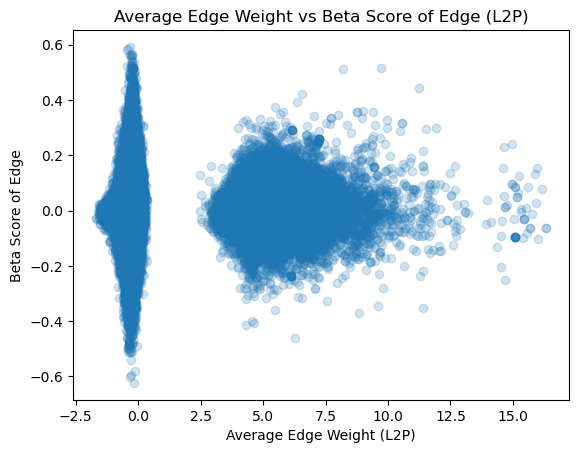

In [12]:
# Scatterplot of average edge weight vs beta score, L2P
plt.scatter(l2p_regression_and_edge['avg_edge_weight'], l2p_regression_and_edge['beta_score'], alpha = 0.2)
plt.xlabel("Average Edge Weight (L2P)")
plt.ylabel("Beta Score of Edge")
plt.title("Average Edge Weight vs Beta Score of Edge (L2P)")

Text(0.5, 1.0, 'Average Edge Weight vs Beta Score of Edge (L2P)')

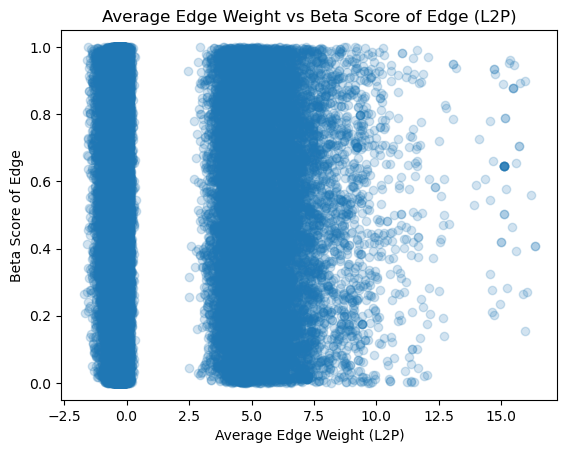

In [13]:
# Scatterplot of average edge weight vs p-value, L2P
plt.scatter(l2p_regression_and_edge['avg_edge_weight'], l2p_regression_and_edge['p_value'], alpha = 0.2)
plt.xlabel("Average Edge Weight (L2P)")
plt.ylabel("Beta Score of Edge")
plt.title("Average Edge Weight vs Beta Score of Edge (L2P)")

Text(0.5, 1.0, 'Average Edge Weight vs Beta Score of Edge (P2L)')

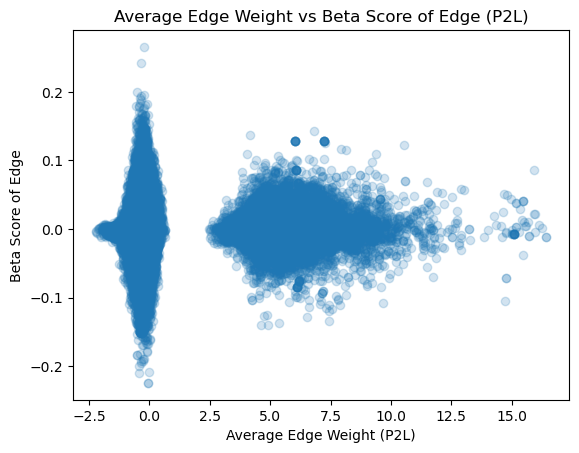

In [14]:
# Scatterplot of average edge weight vs beta score, P2L
plt.scatter(p2l_regression_and_edge['avg_edge_weight'], p2l_regression_and_edge['beta_score'], alpha = 0.2)
plt.xlabel("Average Edge Weight (P2L)")
plt.ylabel("Beta Score of Edge")
plt.title("Average Edge Weight vs Beta Score of Edge (P2L)")

Text(0.5, 1.0, 'Average Edge Weight vs P-Value of Edge')

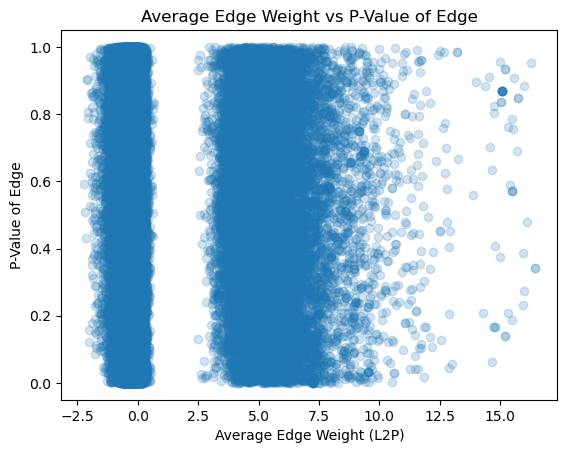

In [15]:
# Scatterplot of average edge weight vs p-value, P2L
plt.scatter(p2l_regression_and_edge['avg_edge_weight'], p2l_regression_and_edge['p_value'], alpha = 0.2)
plt.xlabel("Average Edge Weight (L2P)")
plt.ylabel("P-Value of Edge")
plt.title("Average Edge Weight vs P-Value of Edge")